In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data

In [3]:
df = pd.read_csv("../data/processed/data_final.csv")


In [4]:
df.head()

,date,sleepCore,sleepDeep,sleepREM,sleepUnspecified,awake,sleep_sum,sleep_efficiency,deep_rem_ratio,deep_rem_score,sleep_quality,mean_hrv,stepCount,sportTime
0,2022-10-04,222.0,73.0,101.5,0.0,1.5,398.0,0.996231,0.440101,0.800336,91.787320,36.060950,12128,47.0
1,2022-10-05,291.0,53.5,109.5,0.0,3.0,457.0,0.993435,0.359031,0.530103,80.810239,37.280973,8795,27.0
2,2022-10-06,226.5,76.0,108.0,0.0,10.0,420.5,0.976219,0.448234,0.827446,91.670975,46.271080,12526,45.0
3,2022-10-08,403.0,44.5,147.5,0.0,26.5,621.5,0.957361,0.322689,0.408964,73.800217,43.618358,3911,1.0
4,2022-10-09,371.5,36.5,126.5,0.0,7.0,541.5,0.987073,0.304958,0.349860,73.218764,57.311775,8104,15.0


# Visualizierung

In [5]:
df["sleep_sum_h"] = df["sleep_sum"] / 60

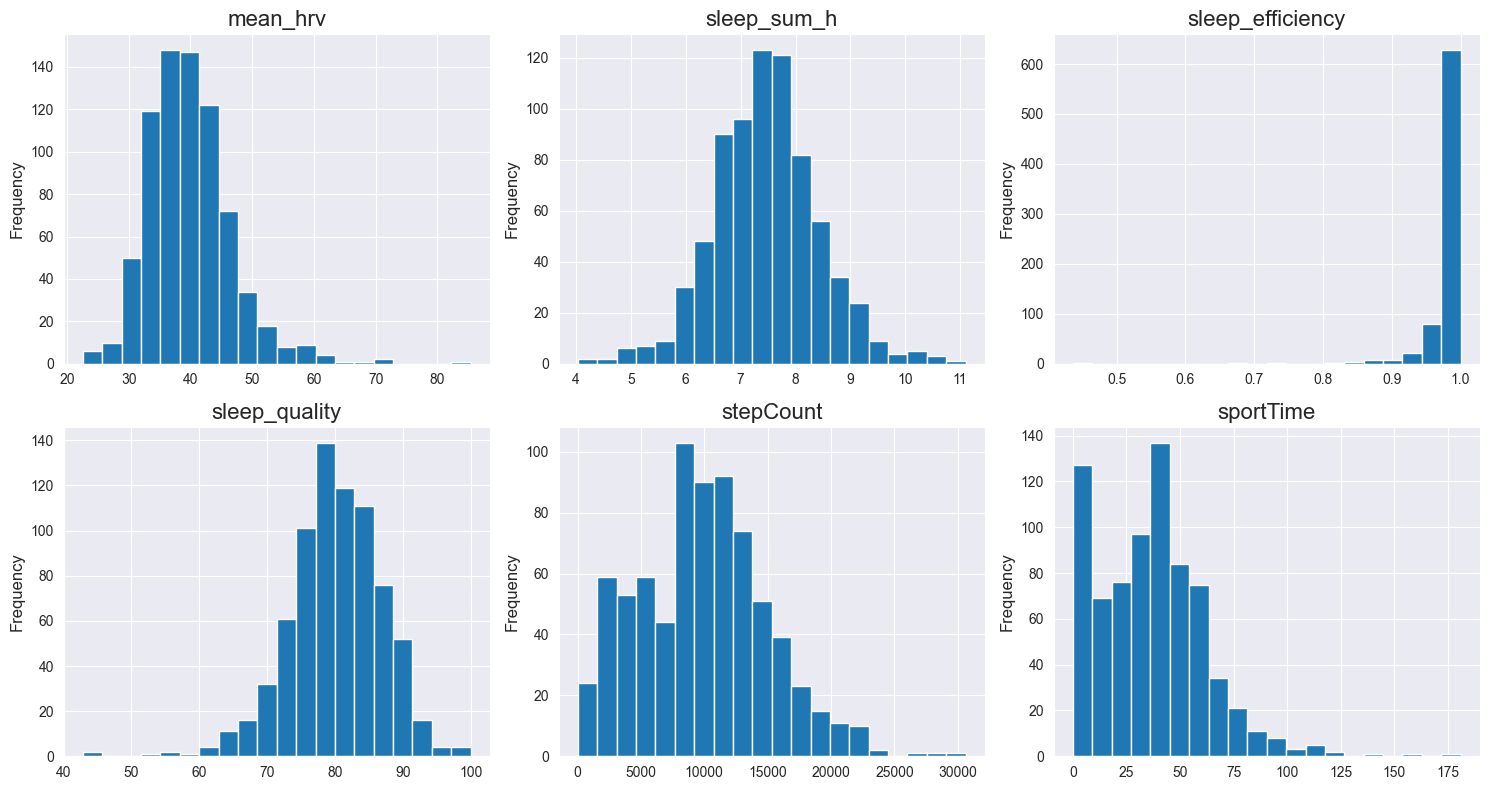

In [6]:
features = [
    "mean_hrv",
    "sleep_sum_h",
    "sleep_efficiency",
    "sleep_quality",
    "stepCount",
    "sportTime"
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.6)
axes = axes.flatten()

for ax, feature in zip(axes, features):
    df[feature].hist(ax=ax, bins=20)
    ax.set_title(feature, fontsize=16)
    ax.set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

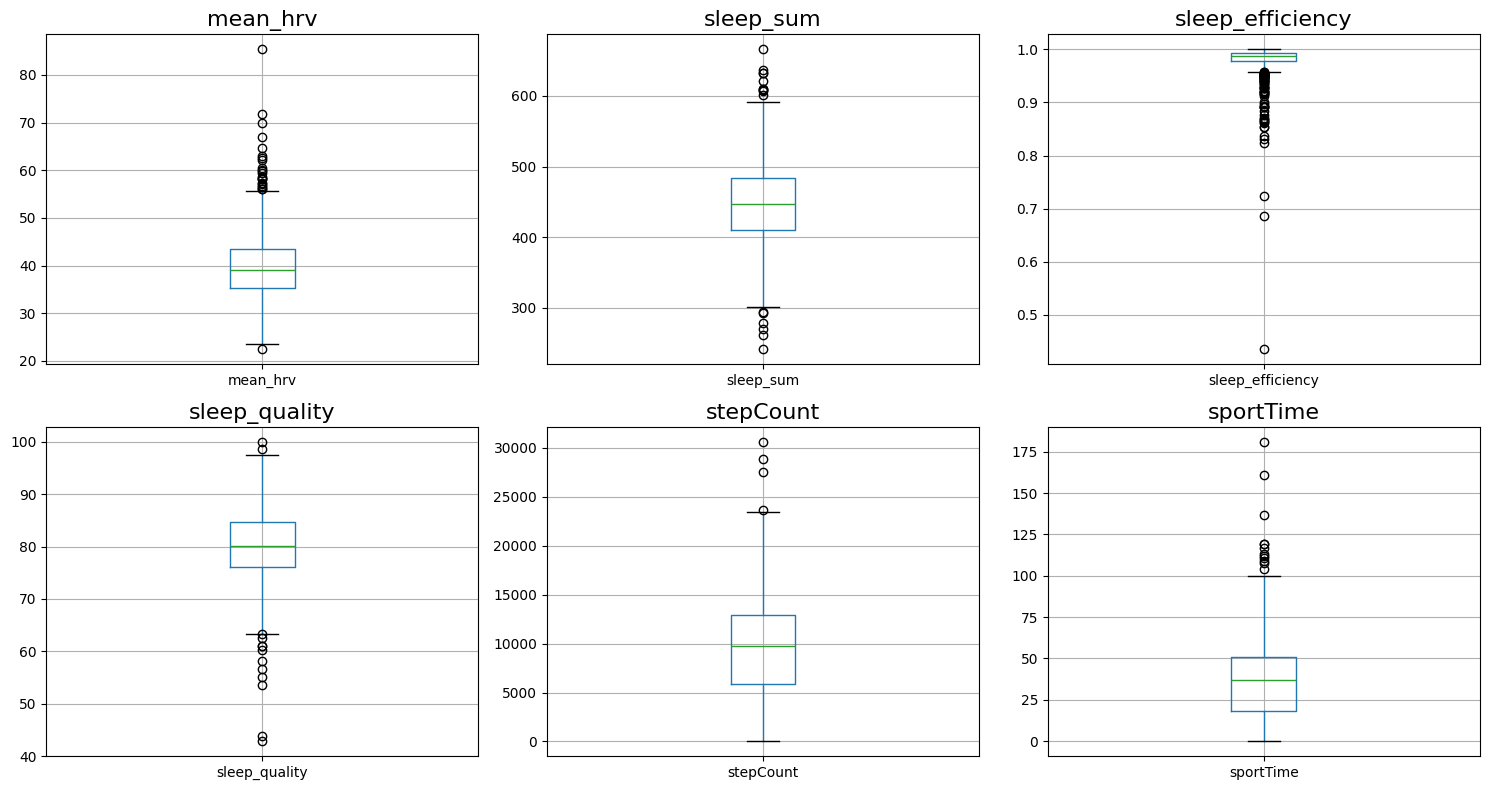

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=1)
axes = axes.flatten()

for ax, feature in zip(axes, features):
    df.boxplot(column=feature, ax=ax)
    ax.set_title(feature, fontsize=16)

plt.tight_layout()
plt.show()

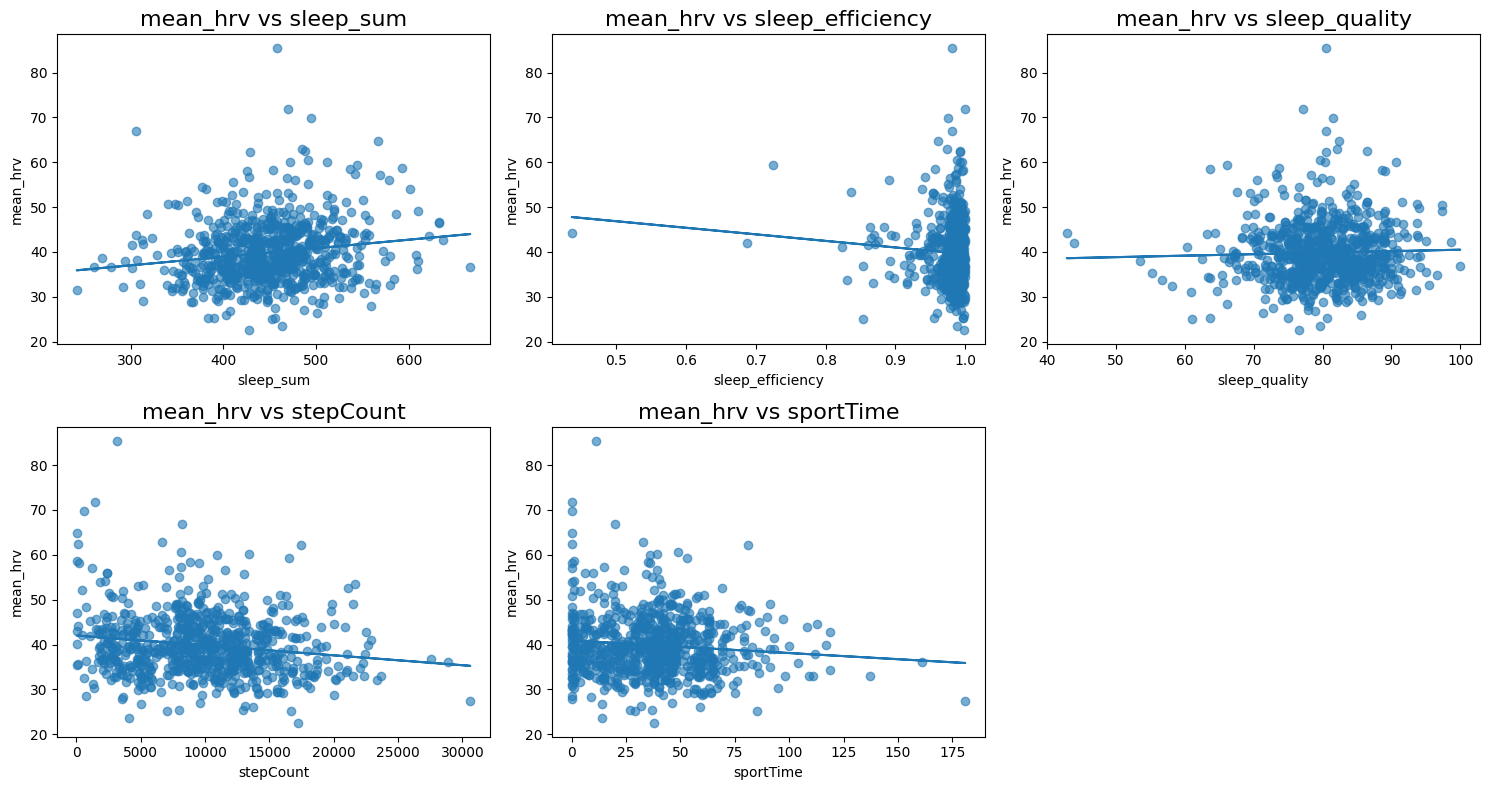

In [60]:
target = "mean_hrv"
features = [
    "sleep_sum",
    "sleep_efficiency",
    "sleep_quality",
    "stepCount",
    "sportTime"
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

axes = axes.flatten()

for ax, feature in zip(axes, features):
    x = df[feature]
    y = df[target]

    # scatter points
    ax.scatter(x, y, alpha=0.6)

    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f"{target} vs {feature}", fontsize=16)

    # regression line (least squares)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m * x + b)

# remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [61]:
features = [
    "mean_hrv",
    "sleep_sum",
    "sleep_efficiency",
    "sleep_quality",
    "stepCount",
    "sportTime"
]
corr_matrix = df[features].corr(method="pearson")
corr_matrix


,mean_hrv,sleep_sum,sleep_efficiency,sleep_quality,stepCount,sportTime
mean_hrv,1.000000,0.160365,-0.071594,0.033325,-0.163520,-0.100045
sleep_sum,0.160365,1.000000,-0.110020,-0.282428,-0.174760,-0.129678
sleep_efficiency,-0.071594,-0.110020,1.000000,0.443569,0.015735,0.045693
sleep_quality,0.033325,-0.282428,0.443569,1.000000,0.027677,0.069624
stepCount,-0.163520,-0.174760,0.015735,0.027677,1.000000,0.864579
sportTime,-0.100045,-0.129678,0.045693,0.069624,0.864579,1.000000


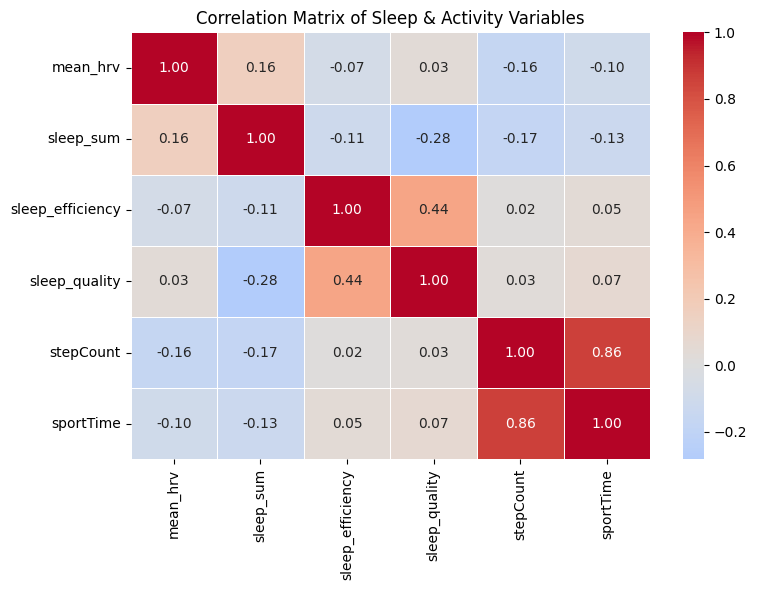

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Sleep & Activity Variables")
plt.tight_layout()
plt.show()

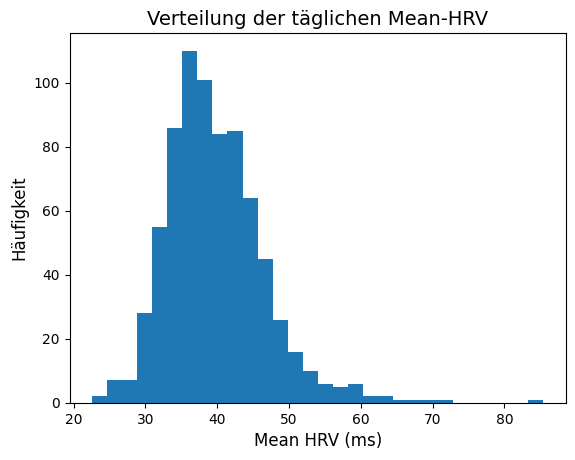

In [63]:
plt.hist(df["mean_hrv"], bins=30)
plt.title("Verteilung der täglichen Mean-HRV", fontsize=14)
plt.xlabel("Mean HRV (ms)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.show()

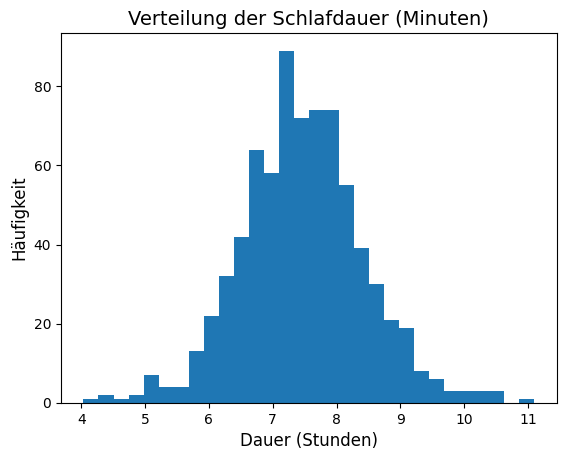

In [64]:
plt.hist(df["sleep_sum"] / 60, bins=30)
plt.title("Verteilung der Schlafdauer (Minuten)", fontsize=14)
plt.xlabel("Dauer (Stunden)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.show()

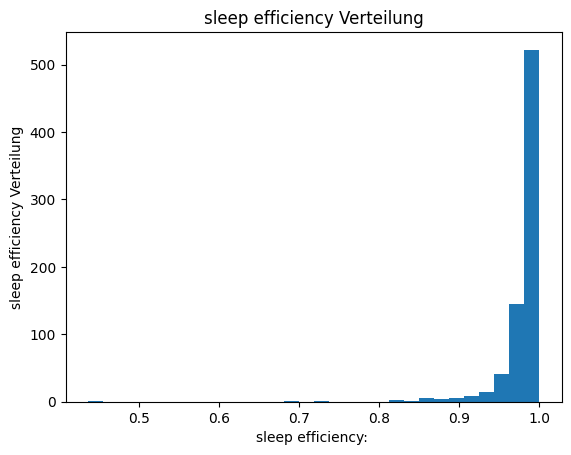

In [65]:
plt.hist(df["sleep_efficiency"],bins=30)
plt.title("sleep efficiency Verteilung")
plt.ylabel("sleep efficiency Verteilung")
plt.xlabel("sleep efficiency: ")
plt.show()
plt.show()

Text(0.5, 1.0, 'sleep efficiency and hrv')

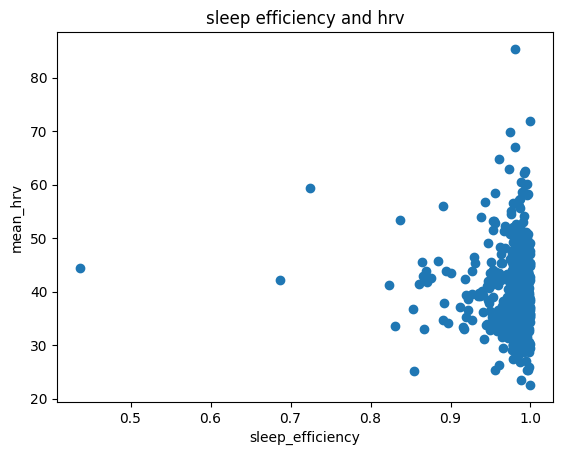

In [66]:
plt.scatter(df['sleep_efficiency'], df['mean_hrv'])
plt.xlabel("sleep_efficiency")
plt.ylabel("mean_hrv")
plt.title("sleep efficiency and hrv")

Text(0.5, 1.0, 'Schlafdauer und HRV')

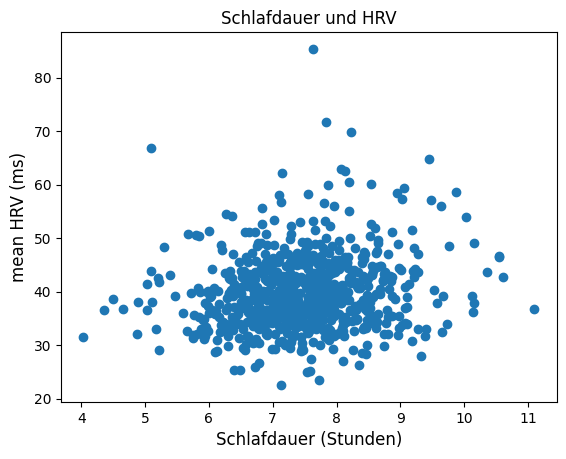

In [67]:
plt.scatter(df['sleep_sum'] / 60, df['mean_hrv'])
plt.xlabel("Schlafdauer (Stunden)", fontsize=12)
plt.ylabel("mean HRV (ms)", fontsize=12)
plt.title("Schlafdauer und HRV")

Text(0.5, 1.0, 'sleep duration and hrv')

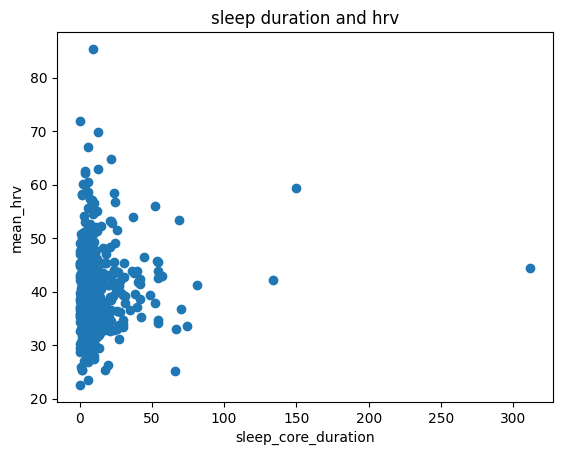

In [68]:
plt.scatter(df['awake'], df['mean_hrv'])
plt.xlabel("sleep_core_duration")
plt.ylabel("mean_hrv")
plt.title("sleep duration and hrv")

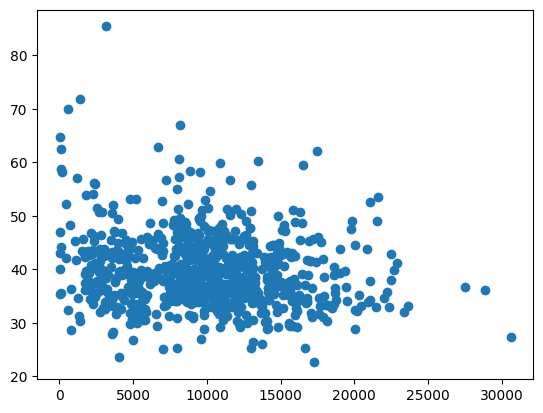

In [69]:
plt.scatter(df['stepCount'], df['mean_hrv'])

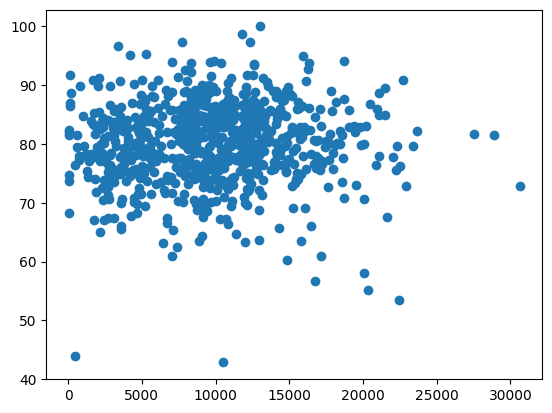

In [70]:
plt.scatter(df['stepCount'], df['sleep_quality'])

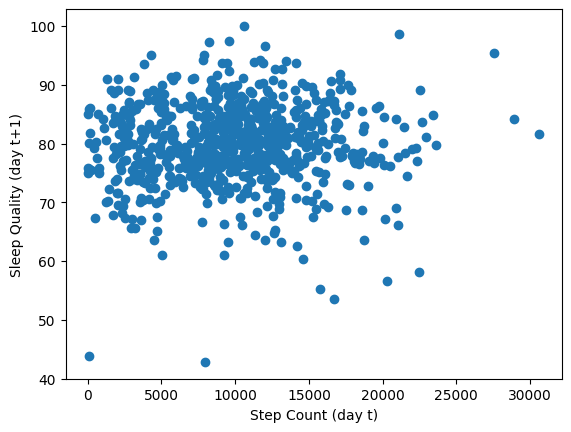

In [71]:
df["sleep_quality_next"] = df["sleep_quality"].shift(-1)

plt.scatter(
    df["stepCount"],
    df["sleep_quality_next"]
)

plt.xlabel("Step Count (day t)")
plt.ylabel("Sleep Quality (day t+1)")
plt.show()

Text(0, 0.5, 'mean_hrv')

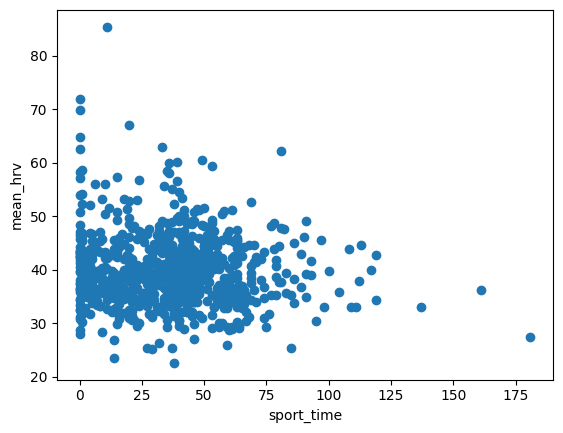

In [72]:
plt.scatter(df['sportTime'], df['mean_hrv'])
plt.xlabel("sport_time")
plt.ylabel("mean_hrv")